## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
Regularized Linear Models - Ridge, Lasso, Elastic Net

다항 회귀 사용 시 주의     
- degree 값 설정에 따라 
- 너무 단순 : 과소적합 모델
- 너무 복잡 : 회귀 계수가 크게 설정. 과(대)적합 발생. 예측 성능도 나쁨    
- 결론 : 회귀 모델은 적절히 데이터에 적합하면서도  
    - 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함  
    
선형 모델의 비용 함수
- RSS 최소화 : 실제값과 예측값의 차이를 최소화
- RSS를 최소하는 것만 고려하면 과적합되고 회귀 계수가 쉽게 커지고
- 이에 따라서 변동성이 심해져서 예측 성능이 저하되기 쉬움
- 따라서 RSS 최소화 방법과 과적합 방지를 위해
- 회기 계수값이 커지지 않도록 하는 균형적인 방법 필요

최적 모델을 위한 비용 함수 구성요소 = RSS 최소화 + 회귀 계수 크기 제어       
-> 학습 데이터 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파리미터 사용 (alpha)

---
선형 회귀 모델에서
  - 비용함수 : 실제값과 예측값의 차이를 최소화하는 것을 목표  
  - 학습 테이터에 지나치게 맞추게 되면, 회귀 계수가 쉽계 커지는 현상 발생(과적합) 
  - 비용함수 최소화하고 회귀 계수는 커지지 않도록 유지하는 것이 필요한데  
    - 이때 회귀 계수의 값의 크기를 제어하기 위해 alpha 파라미터 사용  
      - alpha 값을 크게 해서 회기 계수를 작게하여 과적합을 개선  


### 규제
- 비용함수에 alpha 값으로 패널티를 부여해서
- 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
- L2 방식과 L1 방식

L2 규제
- 회귀 계수 값의 제곱에 대해 패널티를 부여하는 방식
- 회귀 계수의 크기 감소 
- L2 규제를 적용한 회귀 : **릿지(Redge) 방식**
    
L1 규제
- 회귀 계수의 절대값에 대해 패널티를 부여하는 방식
- 영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거  
  - 적절한 피처만 회귀에 포함시키는 피처 선택의 특성     
- L1 규제를 적용한 회귀 : **라쏘(Lasso) 회귀**
    

Elastic Net : L2, L1 규제를 함께 결합한 모델
- 주로 피처가 많은 데이터 세트에서 적용  
- L1 규제로 피처의 개수를 줄임과 동시에  
- L2 규제로 계수 값의 크기 조정  


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 준비

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston_df = df_pop = pd.read_csv('../../data/boston_dataset.csv', index_col=0) 
boston_df.head()
boston_df.tail()

print('보스턴 주택 가격 데이터셋 크기 : ', boston_df.shape)

# 예측해야 할 값 : PRICE (레이블값, 결정값, 타깃값)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


보스턴 주택 가격 데이터셋 크기 :  (506, 14)


In [4]:
# 타깃값 데이터 셋 만들기
y_target = boston_df['PRICE']

# 피처값 데이터 셋 만들기
# 타깃 제외한 나머지 칼럼들
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [5]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data ,
                                                       y_target ,
                                                       test_size=0.3, 
                                                       random_state=156)

###  (1) Ridge 회귀 
- 회귀 계수 값의 제곱에 대해 패널티를 부여하는 L2 규제를 선형 회귀에 적용한 것 
- 사이킷런의 Ridge 클래스 사용해서 릿지 회귀 구현  
- 주요 생성 파라미터는 alpha: alpha L2 규제 계수에 해당 

In [53]:
# Ridge 모델 생성/학습/예측
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10) # alpha 10으로 생성
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

Ridge(alpha=10)

In [54]:
# Ridge 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))

# Ridge 모델 결과
# MSE : 17.699, RMSE : 4.207
# R제곱 : 0.752

# 단순 선형 회귀 모델 결과  : LinearRegression
# MSE : 17.297, RMSE : 4.159
# R제곱 : 0.757

# 큰 차이 없음 

MSE : 17.699, RMSE : 4.207
R제곱 : 0.752


In [55]:
# 교차 검증 수행
from sklearn.model_selection import cross_val_score

# 5 Fold셋으로 MSE 구함
neg_mse_scores = cross_val_score(ridge,
                                 X_data, y_target,
                                 scoring='neg_mean_squared_error',
                                 cv=5)

# neg_mse_scores가 음수값으로 반환되므로 -1 곱해서 사용
rmse_scores = np.sqrt(-1 * neg_mse_scores)
# RMSE는 np.sqrt() 사용
avg_rmse = np.mean(rmse_scores)

# 평가 지표 출력
print('5 Folds 교차검증 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 Folds 교차검증 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 Folds 교차검증 평균 RMSE : ', np.round(avg_rmse, 2))

5 Folds 교차검증 개별 Negative MSE scores :  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 Folds 교차검증 개별 RMSE scores :  [3.38 4.93 5.31 8.64 5.34]
5 Folds 교차검증 평균 RMSE :  5.52


In [56]:
# alpha 값을 [0, 0.1, 1, 10 ,100] 으로 변경하면서 
# RMSE 와 회귀 계수값의 변화 확인 

In [57]:
# Ridge 에 사용할 alpha 파라미터 설정
alphas = [0, 0.1, 1, 10, 100]

# alpha 값에 따른 평균 RMSE 구하기
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
#     ridge.fit(X_train, y_train) # 없어도 됨
    
    # 5 Fold 교차 검증
    neg_mse_scores = cross_val_score(ridge,
                                     X_data, y_target,
                                     scoring='neg_mean_squared_error',
                                     cv=5)

    # neg_mse_scores가 음수값으로 반환되므로 -1 곱해서 사용
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0} 일때 5Folds 교차검증 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

    
# 결과
# alpha 값이 커질수록 RMSE 값이 줄어드는 것 확인 : 성능이 좋아짐
# alpha 값이 150일 때, 5.328으로 가장 좋음

alpha 0 일때 5Folds 교차검증 평균 RMSE : 5.829
alpha 0.1 일때 5Folds 교차검증 평균 RMSE : 5.788
alpha 1 일때 5Folds 교차검증 평균 RMSE : 5.653
alpha 10 일때 5Folds 교차검증 평균 RMSE : 5.518
alpha 100 일때 5Folds 교차검증 평균 RMSE : 5.330


### 각 alpha 값에  따른 회귀 값을 시각화

Ridge(alpha=0)

Text(0.5, 1.0, 'alpha:0')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0'}>

Ridge(alpha=0.1)

Text(0.5, 1.0, 'alpha:0.1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0.1'}>

Ridge(alpha=1)

Text(0.5, 1.0, 'alpha:1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:1'}>

Ridge(alpha=10)

Text(0.5, 1.0, 'alpha:10')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:10'}>

Ridge(alpha=100)

Text(0.5, 1.0, 'alpha:100')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:100'}>

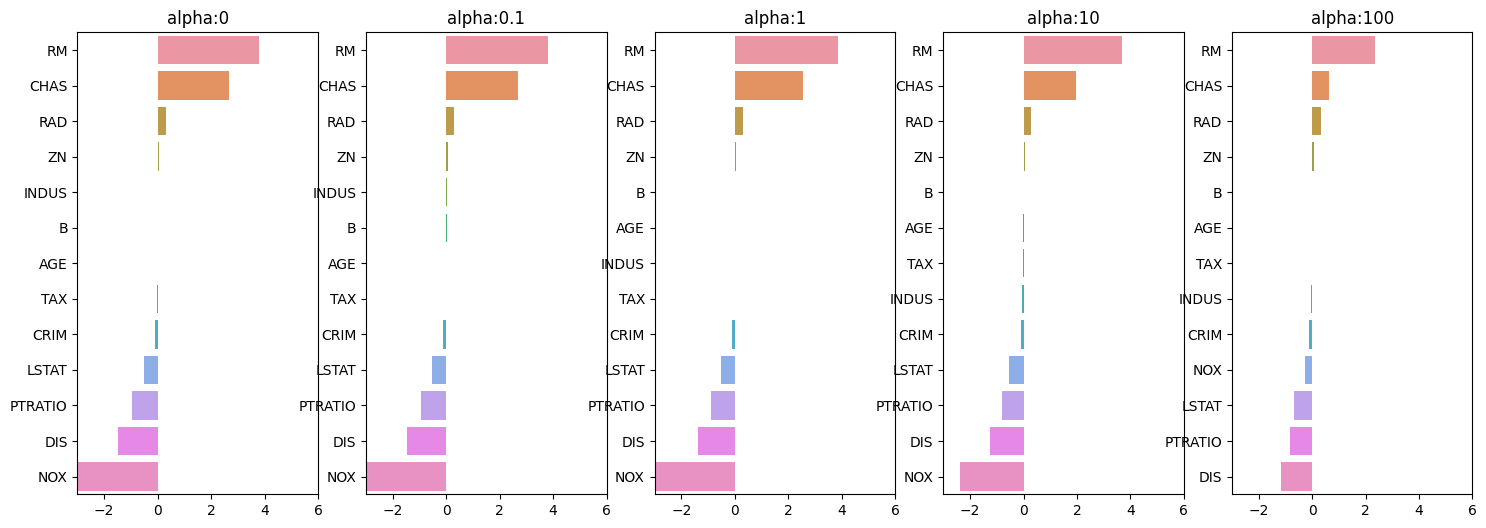

In [58]:
# 각 alpha 값에  따른 회귀 값을 시각화
# alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화

# 각 alpha값(5개)에 따른 회귀 계수값 시각화하기 위해 5열로 된 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha값을 df로 저장
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha) # 초기화
    ridge.fit(X_data, y_target) # 학습
    
    # df에 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+ str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 회귀 계수 시각화 : 정렬 후 출력
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    

plt.show()    

In [59]:
# alpha:0 컬럼 기준 내림차순 정렬
coeff_df.sort_values(by='alpha:0', ascending=False)

# 결과
# RM : alpha 값이 커지면서 회귀계수 값이 작아짐
# 회귀계수가 줄어들면서 점점 성능 좋아지는데
# 가장 큰 값들도 적절한 수준으로 맞춰들어가면서 최적화 되어감 (NOX)
# 즉, 최적의 회귀모델로 만들어짐

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [60]:
# Ridge 최적의 alpha=100 으로 모델/생성/학습/예측
ridge = Ridge(alpha=100) 
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))

# Ridge 최적의 alpha=100 으로 모델/생성/학습/예측한 결과
# MSE : 19.362, RMSE : 4.400
# R제곱 : 0.728

Ridge(alpha=100)

MSE : 19.362, RMSE : 4.400
R제곱 : 0.728


### 참고 
- 선형 회귀 모델에서 비용함수는 실제값과 예측값의 차이를 최소화하는 것을 목표   
- 학습 데이터에 지나치게 맞추게 되면, 회귀 게수가 쉽게 커지는 현상이 발생   
- 비용함수는 최소화하고 회귀 계수는 커지지 않도록 유지하는 것이 필요한데  
- 이때 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터 alpha 사용  
- 비용함수 목표 = Min(RSS + alpha * 회귀계수)  
    - alpha 값이 0 또는 매우 작으면 비용함수 Min(RSS)이 되고,  
    - alpha 값이 커지면 회귀 계수를 작게 해서 비용함수 목표를 이룰 수 있음  
    - 즉, alpha 값을 작게 하면 회귀 계수 값이 커져도 어느 정도 상쇄되고  
    - alpha 값을 크게하면 회수 계수를 작게해서 과적합을 개선     


## (2) 라쏘 (Lasso) 회귀
- 회귀 계수의 절대값에 패널티를 부여하는 L1규제를 선형 회귀에 적용한 것
- 영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거
- 적절한 피처만 회귀에 포함시키는 피처 선택의 특성

- 사이킷런의 Lasso 클래스를 이용해서 라쏘 회귀 구현
- 주요 생성 파라미터 alpha : 라소 회귀의 alpha L1 규제 계수 해당    

In [37]:
# 라쏘 모델 생성/학습/예측
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

Lasso(alpha=10)

In [38]:
# Lasso 평가 
from sklearn.metrics import mean_squared_error, r2_score

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))


# Ridge 모델 결과
# MSE : 17.699, RMSE : 4.207
# R제곱 : 0.752

# 단순 선형 회귀 모델 결과  : LinearRegression
# MSE : 17.297, RMSE : 4.159
# R제곱 : 0.757

# Lasso모델 결과
# MSE : 33.030, RMSE : 5.747
# R제곱 : 0.536

# lasso가 제일 낮음

MSE : 33.030, RMSE : 5.747
R제곱 : 0.536


In [40]:
# 교차 검증 수행
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lasso,
                                X_data, y_target,
                                scoring='neg_mean_squared_error',
                                cv=5)

rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 평가 지표 출력
print('5 Folds 교차검증 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 Folds 교차검증 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 Folds 교차검증 평균 RMSE : ', np.round(avg_rmse, 2))

5 Folds 교차검증 개별 Negative MSE scores :  [-27.79 -46.4  -80.32 -61.56 -16.3 ]
5 Folds 교차검증 개별 RMSE scores :  [5.27 6.81 8.96 7.85 4.04]
5 Folds 교차검증 평균 RMSE :  6.59


In [41]:
# alpha 값을 [0.07, 0.1, 0.5, 1, 3] 으로 변경하면서 
# RMSE와 회귀 계수 값의 변화 측정

alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    
    # 5 fold 교차 검증
    neg_mse_scores = cross_val_score(lasso,
                                X_data, y_target,
                                scoring='neg_mean_squared_error',
                                cv=5)

    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0} 일때 5Folds 교차검증 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

# alpha값 튜닝 및 교차검증 결과 
# alpha가 커질수록 RMSE가 커짐 : 성능 나빠짐
# alph 0.07일때 가장 좋음 5.612

# Ridge가 가장 좋은 수치 : RMSE : 5.330

alpha 0.07 일때 5Folds 교차검증 평균 RMSE : 5.612
alpha 0.1 일때 5Folds 교차검증 평균 RMSE : 5.615
alpha 0.5 일때 5Folds 교차검증 평균 RMSE : 5.669
alpha 1 일때 5Folds 교차검증 평균 RMSE : 5.776
alpha 3 일때 5Folds 교차검증 평균 RMSE : 6.189


Lasso(alpha=0.07)

Text(0.5, 1.0, 'alpha:0.07')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0.07'}>

Lasso(alpha=0.1)

Text(0.5, 1.0, 'alpha:0.1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0.1'}>

Lasso(alpha=0.5)

Text(0.5, 1.0, 'alpha:0.5')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0.5'}>

Lasso(alpha=1)

Text(0.5, 1.0, 'alpha:1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:1'}>

Lasso(alpha=3)

Text(0.5, 1.0, 'alpha:3')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:3'}>

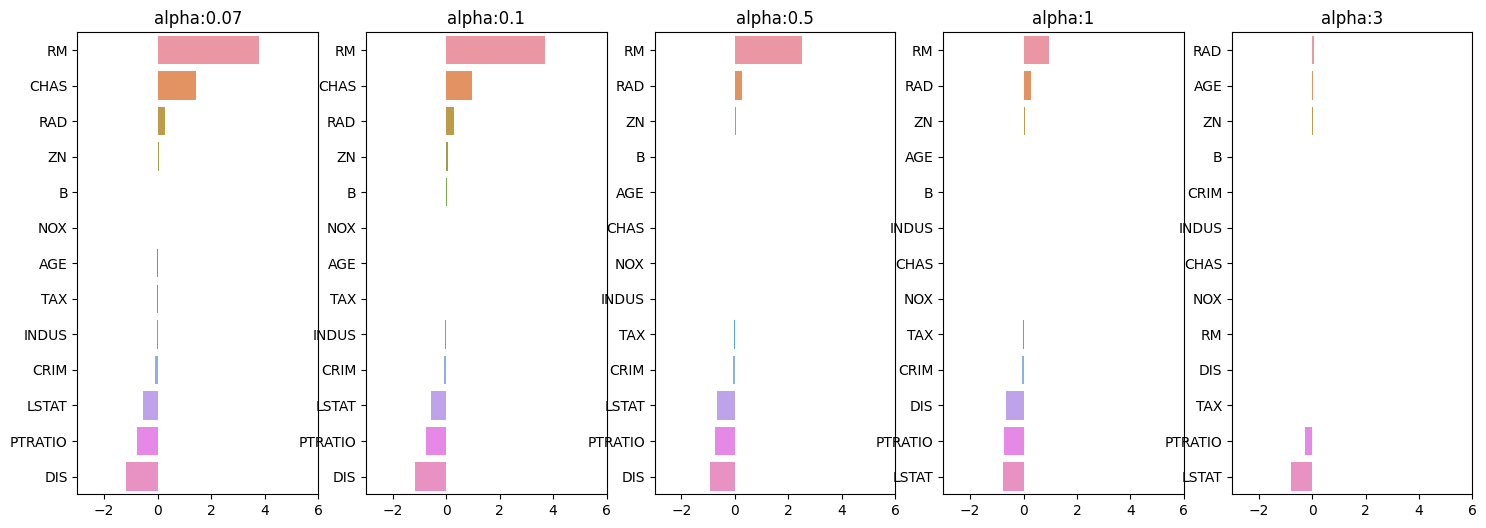

In [44]:
# 각 alpha에 따른 회귀 계수 값을 시각화
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha값을 df로 저장
coeff_ls_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha) # 초기화
    lasso.fit(X_data, y_target) # 학습
    
    # df에 추가
    coeff = pd.Series(data=lasso.coef_, index=X_data.columns)
    colname = 'alpha:'+ str(alpha)
    coeff_ls_df[colname] = coeff
    
    # 막대 그래프로 회귀 계수 시각화 : 정렬 후 출력
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    

plt.show()  

In [50]:
# alpha 값에 다른 칼럼별 회귀 계수 출력
coeff_ls_df.sort_values(by='alpha:0.07',  ascending=False)

# 결과
# RM : alpha값이 커질수록 회귀계수값이 작아짐
# 일부 feature(NOX, DIS, RM, CHAS 등) 의 회귀 계수는 아예 0 으로 줄었음
# NOX 피처의 경우 alpha 0.7부터 회귀 계수가 0이 되었음
# 회귀 계수가 0인 피처는 회귀식에서 제외되면서
# 피처 선택의 효과를 보게 됨
# 따라서 전체적인 성능이 향상되는 효과를 볼 수 있음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [51]:
# 최적의 alpha값으로 다시 학습
lasso = Lasso(alpha=0.07)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)


# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))

# Lasso 최적의 alpha=0.07 으로 모델/생성/학습/예측한 결과
# MSE : 17.742, RMSE : 4.212
# R제곱 : 0.751

# Ridge 최적의 alpha=100 으로 모델/생성/학습/예측한 결과
# MSE : 19.362, RMSE : 4.400
# R제곱 : 0.728

# 최적의 alpha로 모델/생성/학습/예측한 결과
# 릿지 라쏘 비슷하지만 
# 릿지가 근소차로 수치가 좋음

Lasso(alpha=0.07)

MSE : 17.742, RMSE : 4.212
R제곱 : 0.751


## (3)  엘라스틱 넷(Elastic Net) 회귀

- 급격한 회귀 계수 변동을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것
- 단점 : L1과 L2를 결합한 규제로 수행 시간이 상대적으로 오래 걸린다는 것
- 사이킷런의 ElasticNet 클래스 사용
- 주요 파라미터 : alpha와 l1_ratio
- ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha 값과 다름

엘라스틱 규제 : aL1 + bL2  
- a : L1 규제의 alpha 값  
- b : L2 규제의 alpha 값  
- ElasticNet 클래스의 alpha : a + b  
- ---    
- l1_ratio : a / (a + b)  
- l1_ratio가 0이면 a가 0이 되어 L2 규제와 동일  
- l1_ratio가 1이면 b가 0이 되어 L1규제와 동일  

In [62]:
# ElasticNet 모델 생성/학습/예측
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=10)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

ElasticNet(alpha=10)

In [63]:
# elastic 평가 
from sklearn.metrics import mean_squared_error, r2_score

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))


# 단순 선형 회귀 모델 결과  : LinearRegression
# MSE : 17.297, RMSE : 4.159
# R제곱 : 0.757

# Ridge 모델 결과
# MSE : 17.699, RMSE : 4.207
# R제곱 : 0.752

# Lasso모델 결과
# MSE : 33.030, RMSE : 5.747
# R제곱 : 0.536

# Elastic 모델 결과
# MSE : 32.604, RMSE : 5.710
# R제곱 : 0.542

# elasticNet 모델 성능이 lasso모델보다 근소차로 약간 좋음 (별 차이 없음)

MSE : 32.604, RMSE : 5.710
R제곱 : 0.542


In [65]:
# elastic 교차 검증 수행
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(elastic,
                                X_data, y_target,
                                scoring='neg_mean_squared_error',
                                cv=5)

rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 평가 지표 출력
print('5 Folds 교차검증 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 Folds 교차검증 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 Folds 교차검증 평균 RMSE : ', np.round(avg_rmse, 2))

5 Folds 교차검증 개별 Negative MSE scores :  [-26.39 -43.13 -77.93 -60.01 -16.65]
5 Folds 교차검증 개별 RMSE scores :  [5.14 6.57 8.83 7.75 4.08]
5 Folds 교차검증 평균 RMSE :  6.47


In [70]:
# alpha 값을 [0.07, 0.1, 0.5, 1, 3] 으로 변경하면서 
# RMSE와 회귀 계수 값의 변화 측정(교차검증)

alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    elastic = ElasticNet(alpha=alpha)
    
    # 5 fold 교차 검증
    neg_mse_scores = cross_val_score(elastic,
                                X_data, y_target,
                                scoring='neg_mean_squared_error',
                                cv=5)

    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0} 일때 5Folds 교차검증 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

# alpha값 튜닝 및 교차검증 결과
# linear regression(교차검증만) : 
# 릿지  : alpha 값이 150일 때, 5.328  
# 라쏘  : alph 0.07일때 가장 좋음 5.612    
# 엘라스틱 넷  : alpha 0.5 일때 5Folds 교차검증 평균 RMSE : 5.413

alpha 0.07 일때 5Folds 교차검증 평균 RMSE : 5.503
alpha 0.1 일때 5Folds 교차검증 평균 RMSE : 5.478
alpha 0.5 일때 5Folds 교차검증 평균 RMSE : 5.413
alpha 1 일때 5Folds 교차검증 평균 RMSE : 5.522
alpha 3 일때 5Folds 교차검증 평균 RMSE : 5.954


ElasticNet(alpha=0.07)

Text(0.5, 1.0, 'alpha:0.07')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0.07'}>

ElasticNet(alpha=0.1)

Text(0.5, 1.0, 'alpha:0.1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0.1'}>

ElasticNet(alpha=0.5)

Text(0.5, 1.0, 'alpha:0.5')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:0.5'}>

ElasticNet(alpha=1)

Text(0.5, 1.0, 'alpha:1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:1'}>

ElasticNet(alpha=3)

Text(0.5, 1.0, 'alpha:3')

(-3.0, 6.0)

<Axes: title={'center': 'alpha:3'}>

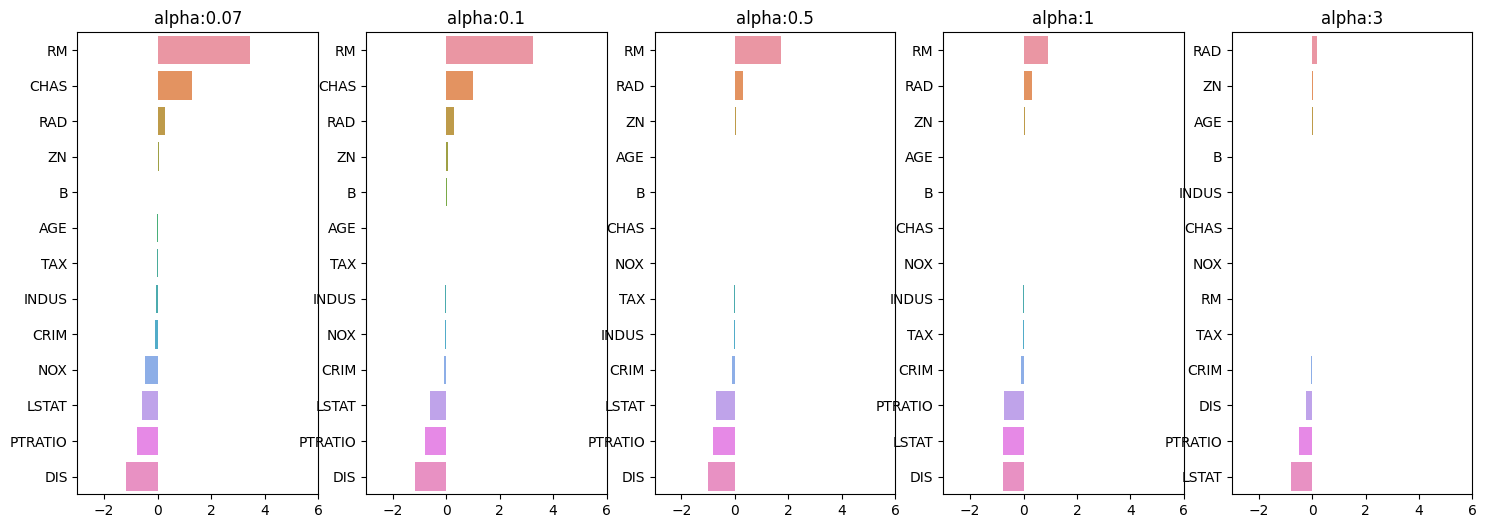

In [69]:
# 각 alpha에 따른 회귀 계수 값을 시각화
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha값을 df로 저장
coeff_el_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha) # 초기화
    elastic.fit(X_data, y_target) # 학습
    
    # df에 추가
    coeff = pd.Series(data=elastic.coef_, index=X_data.columns)
    colname = 'alpha:'+ str(alpha)
    coeff_el_df[colname] = coeff
    
    # 막대 그래프로 회귀 계수 시각화 : 정렬 후 출력
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    

plt.show()  

In [71]:
# alpha 값에 다른 칼럼별 회귀 계수 출력
coeff_el_df.sort_values(by='alpha:0.5',  ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.445833,3.252662,1.723610,0.933936,0.000000
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
B,0.010035,0.009963,0.008997,0.008339,0.007271
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903


In [73]:
# 가장 좋은 결과가 나온 alpha 0.5를 기준으로 다시 학습
elastic = ElasticNet(alpha=0.5)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))

# 최적의 alpha로 모델/생성/학습/예측한 결과

# Lasso 최적의 alpha=0.07 RMSE : 4.212
# Ridge 최적의 alpha=100 RMSE : 4.400
# Elastic 최적의 alpha=0.5 RMSE : 4.470

ElasticNet(alpha=0.5)

MSE : 19.978, RMSE : 4.470
R제곱 : 0.720


### 릿지, 라쏘, 엘라스틱넷 회귀 결론

규제 선형 회귀의 가장 대표적인 기법인 릿지, 라쏘, 엘라스틱넷 회귀 결론
- 어떤 것이 가장 좋은지는 상황에 따라 다름
- 각 알고리즘에서 하이퍼 파라미터를 변경해 가면서
- 최적의 예측 성능을 찾아내야 함

- 그러나 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지 않게
- 먼제 데이터 분포도의 정규화와 인코딩 방법이 매우 중요함

In [74]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 뒤에 ElasticNet에서도 사용할 수 있도록 함수로 작성

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고
# 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######') # Log 출력
        
    for param in params:  # alpha 값 변화
        # 모델 별 해당 클래스 객체 생성
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # 교차 검증 수행
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출        

        model.fit(X_data_n , y_target_n)
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df

In [75]:
# 릿지 모델 기반으로 수행
ridge_alphas = [0, 0.1,1, 10, 100]
coeff_ridge_df = get_linear_reg_eval('Ridge', 
                                    params=ridge_alphas,
                                    X_data_n=X_data,
                                    y_target_n=y_target)
# 라쏘 모델 기반으로 수행
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', 
                                    params=lasso_alphas,
                                    X_data_n=X_data,
                                    y_target_n=y_target)
# 엘리스틱넷 예제
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elasti_df = get_linear_reg_eval('ElasticNet', 
                                    params=elastic_alphas,
                                    X_data_n=X_data,
                                    y_target_n=y_target)

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 5.829 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 
#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 
